# Jupyter Notebook to Extract Word Combinations from given text

#### The first step before running any python code is to import required modules

To run this Jupyter notebook, the pre-requisite is to install python version 3.7 or above (Installing Anaconda will take care of all the tools in addtion to Python.

To run any code place your cursor in the respective cell and press Shift+Enter. You should be seeing an * when the code is running and a number (indicating the run step) will appear after the code is run successfully

In [1]:
# Import all required modules/Libraries, Import should be done only once during a session.
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import langid # pip install langid - incase it is not installed

In [2]:
# Code to make plotly offline, so that we don't get an error while dealing with large number of text inputs
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

If you recieve an error, while importing any of these packages, it just means that module is not installed on your system. 

To fix it run this command in a cell below
 pip install cufflinks (in case you get an error - saying module 'cufflinks not found'
 
PS: Typically textblob, plotly, and cufflinks needs to be installed by using pip install, while the other packages are part of your regular python installation

In [3]:
# Read your input text to a python Dataframe
df = pd.read_excel ('RoWMSCInfo.xlsx') 
df.head()

,Comments
0,Vs: Urgent action: Change in Workday related t...
1,Requesting review of Student intern agreements
2,Frihed til forandring
3,Fwd: Re: Fw: Snapshot of my Compa Ratio (PMR) ...
4,Need Urgent help with loading new contract det...


Place this Jupyter Note Book and the excel file with comments in the same folder in any directory of your system

In [4]:
# Chat data doesnot add any value - exclude chat tickets from text analytics
# Here a 'preprocess' function is defined to remove unnecessary text

def preprocess(Comments): 
    Comments = Comments.str.replace('Inbound call from ', '')
    Comments = Comments.str.replace('CNUM ', '')
    Comments = Comments.str.replace('CALL NOTES ', '')
    Comments = Comments.str.replace('---------------', '')
    Comments = Comments.str.replace('Inbound Call - ', '')
    Comments = Comments.str.replace('Chat with ', '')
    Comments = Comments.str.replace('[EXTERNAL] ', '')
    Comments = Comments.str.replace('see attached file', '')
    Comments = Comments.str.replace('gielyn nicole lacdan', '')
    Comments = Comments.str.replace('uk ibm ibmgb', '')
    Comments = Comments.str.replace('cic uk ibm', '')
    Comments = Comments.str.replace('ibm com tammie', '')
    Comments = Comments.str.replace('limited registered in england and wales with number', '')
    Comments = Comments.str.replace('thank you regards', '')
    Comments = Comments.str.replace('ibm', '')
    Comments = Comments.str.replace('chat ', '')
    Comments = Comments.str.replace('expense ', '')
    Comments = Comments.str.replace('agent ', '')
    Comments = Comments.str.replace('com', '')
    Comments = Comments.str.replace('https', '')
    Comments = Comments.str.replace('call regarding', '')
    Comments = Comments.str.replace('esc ', '')
    Comments = Comments.str.replace('empservices', '')
    Comments = Comments.str.replace('mozilla ', '')
    Comments = Comments.str.replace('regarding', '')
    Comments = Comments.str.replace('w3', '')
    Comments = Comments.str.replace('agent', '')
    Comments = Comments.str.replace('utc', '')
    Comments = Comments.str.replace('chat started', '')
    Comments = Comments.str.replace('web', '')
    Comments = Comments.str.replace('id', '')
    Comments = Comments.str.replace('chat', '')
    return Comments

In [5]:
# Removing empty cells from the text
df = df[~df['Comments'].isnull()]

In [6]:
# Preprocessing the comments text
df['Comments'] = preprocess(df['Comments'])

In [7]:
# comment_lang: Identifies Comment language
df['comment_lang'] = df['Comments'].map(lambda text: langid.classify(text))
Lang_list = df["comment_lang"].tolist()
df1 = pd.DataFrame(Lang_list, columns=['comm_lang', 'lan_prob'])
df['comm_lang'] = df1['comm_lang']

In [8]:
# Creating additional columns for Sentiment, Comment Length (Number of Chars), and Word count
# trans_comment: translates comments to English
df['comment_polarity'] = df['Comments'].map(lambda text: TextBlob(text).sentiment.polarity)
df['comment_len'] = df['Comments'].astype(str).apply(len)
df['word_count'] = df['Comments'].apply(lambda x: len(str(x).split()))
#df['trans_comment'] = df['Comments'].map(lambda text: TextBlob(text).translate(to = 'en'))

In [9]:
df.head()

,Comments,comment_lang,comm_lang,comment_polarity,comment_len,word_count
0,Vs: Urgent action: Change in Workday related t...,"(en, -87.89794111251831)",en,-0.133333,97,15
1,Requesting review of Student intern agreements,"(en, -21.19211769104004)",en,0.000000,46,6
2,Frihed til forandring,"(da, -80.60031509399414)",da,0.000000,21,3
3,Fwd: Re: Fw: Snapshot of my Compa Ratio (PMR) ...,"(en, -65.61607360839844)",en,0.000000,58,11
4,Need Urgent help with loading new contract det...,"(en, -84.91405725479126)",en,0.136364,75,12


In [10]:
#Comments Distribution by language
df.groupby('comm_lang').count()['Comments'].iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Bar chart of Comment Languages', xTitle='Languages')

In [11]:
# Creating a dataframe with Comments in English only.
df = df[df["comm_lang"] == "en"]

In [12]:
df.describe()

,comment_polarity,comment_len,word_count
count,49.000000,49.000000,49.000000
mean,-0.010482,44.755102,7.571429
std,0.116184,33.462996,6.238322
min,-0.750000,4.000000,1.000000
25%,0.000000,20.000000,3.000000
50%,0.000000,36.000000,6.000000
75%,0.000000,58.000000,11.000000
max,0.233333,114.000000,21.000000


In [13]:
# Running this code creates a Histogram with sentiment (Polarity) Distribution in your comments
# Value of +1 indicates Positive sentiment in the text, 
# while 0, and -1 indicates neutral and negative sentiments respectively

df['comment_polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [14]:
# Creates a histogram with distribution of Comments length (number of charaters including space)
df['comment_len'].iplot(
    kind='hist',
    bins=300,
    xTitle='Text length - No. of Characters',
    linecolor='black',
    yTitle='Count',
    title='Text Length Distribution - ACA Input text 14-Feb-2020')

In [15]:
# Creates a histogram with distribution of word count in input text
df['word_count'].iplot(
    kind='hist',
    bins=50,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Comments Word Count Distribution')

In [16]:
# Defining a function to produce a list of top words in input text
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [17]:
# This produces the list fo top 20 Words in input text
# The number 20 here can be changed to increase the change the number of words in the output
common_words = get_top_n_words(df['Comments'], 200)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Comments' , 'count'])
df1.groupby('Comments').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in chat input before removing stop words')


to 22
re 14
one 12
fw 11
with 10
on 8
request 8
hpartner 8
review 7
in 6
for 6
act 6
engage 6
initiative 6
want 6
schedule 6
session 6
msc 6
engagement 6
results 6
of 5
md002 5
workday 4
vs 3
urgent 2
action 2
change 2
fwd 2
from 2
need 2
retention 2
bonus 2
rules 2
service 2
confential 2
digital 2
classroom 2
transfer 2
dk 2
off 2
employee 2
how 2
related 1
organization 1
wrong 1
setup 1
vibeke 1
vestergaard 1
requesting 1
student 1
intern 1
agreements 1
snapshot 1
my 1
compa 1
ratio 1
pmr 1
help 1
loading 1
new 1
contract 1
details 1
patrick 1
rono 1
eph 1
salary 1
range 1
clarity 1
loend 1
day 1
eva 1
johannessen 1
3273215 1
exception 1
backfill 1
angola 1
question 1
years 1
and 1
severance 1
stand 1
by 1
policy 1
saudi 1
maternity 1
cover 1
ipad 1
information 1
ing 1
actions 1
within 1
ism 1
line 1
info 1
assessment 1
hquery 1
country 1
enrollment 1
learning 1
activity 1
id 1
ltu64582 1
talk 1
degie 1
bao 1
emp 1
zz009g 1
roll 1
ccad 1
cash 1
award 1
updated 1
separation 1
unused 1

In [18]:
# Defining a function to produce a list of top words in input text without stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

"Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead."

In [19]:
# This produces the list fo top 20 Words in input text - Excluding stop words
# The number 20 here can be changed to increase the change the number of words in the output
common_words = get_top_n_words(df['Comments'], 200)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Comments' , 'count'])
df2.groupby('Comments').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Chat Input after removing stop words')

fw 11
request 8
hpartner 8
review 7
act 6
engage 6
initiative 6
want 6
schedule 6
session 6
msc 6
engagement 6
results 6
md002 5
workday 4
vs 3
urgent 2
action 2
change 2
fwd 2
need 2
retention 2
bonus 2
rules 2
service 2
confential 2
digital 2
classroom 2
transfer 2
dk 2
employee 2
related 1
organization 1
wrong 1
setup 1
vibeke 1
vestergaard 1
requesting 1
student 1
intern 1
agreements 1
snapshot 1
compa 1
ratio 1
pmr 1
help 1
loading 1
new 1
contract 1
details 1
patrick 1
rono 1
eph 1
salary 1
range 1
clarity 1
loend 1
day 1
eva 1
johannessen 1
3273215 1
exception 1
backfill 1
angola 1
question 1
years 1
severance 1
stand 1
policy 1
saudi 1
maternity 1
cover 1
ipad 1
information 1
ing 1
actions 1
ism 1
line 1
info 1
assessment 1
hquery 1
country 1
enrollment 1
learning 1
activity 1
id 1
ltu64582 1
talk 1
degie 1
bao 1
emp 1
zz009g 1
roll 1
ccad 1
cash 1
award 1
updated 1
separation 1
unused 1
leaves 1
requested 1
profile 1
alps 1
months 1
old 1
update 1
speak 1
supplemental 1
workin

In [20]:
# Defining a function to produce a list of top two word combinations in input text without stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [21]:
# This produces the list fo top 20 Two word combinations in input text - Excluding stop words
# The number 20 here can be changed to increase the change the number of words in the output
common_words = get_top_n_bigram(df['Comments'], 200)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Comments' , 'count'])
df3.groupby('Comments').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in Comments after removing stop words')

act engage 6
engage initiative 6
initiative want 6
want schedule 6
schedule session 6
session msc 6
msc hpartner 6
hpartner review 6
review engagement 6
engagement results 6
retention bonus 2
bonus rules 2
md002 digital 2
digital vs 2
vs md002 2
md002 classroom 2
vs urgent 1
urgent action 1
action change 1
change workday 1
workday related 1
related organization 1
organization wrong 1
wrong setup 1
setup vibeke 1
vibeke vestergaard 1
requesting review 1
review student 1
student intern 1
intern agreements 1
fwd fw 1
fw snapshot 1
snapshot compa 1
compa ratio 1
ratio pmr 1
pmr workday 1
need urgent 1
urgent help 1
help loading 1
loading new 1
new contract 1
contract details 1
details workday 1
workday patrick 1
patrick rono 1
fw eph 1
eph salary 1
salary range 1
clarity loend 1
loend day 1
day eva 1
eva johannessen 1
request 3273215 1
3273215 retention 1
fw fw 1
fw exception 1
exception request 1
request backfill 1
backfill angola 1
question years 1
years service 1
service severance 1
sta

In [22]:
# Defining a function to produce a list of Three word combinations in input text without stop words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [23]:
# This produces the list fo top 100 Three word combinations in input text - Excluding stop words
# The number 20 here can be changed to increase the change the number of words in the output
common_words = get_top_n_trigram(df['Comments'], 200)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Comments' , 'count'])
df4.groupby('Comments').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 100 Trigrams in Comments after removing stop words')

act engage initiative 6
engage initiative want 6
initiative want schedule 6
want schedule session 6
schedule session msc 6
session msc hpartner 6
msc hpartner review 6
hpartner review engagement 6
review engagement results 6
retention bonus rules 2
md002 digital vs 2
digital vs md002 2
vs md002 classroom 2
vs urgent action 1
urgent action change 1
action change workday 1
change workday related 1
workday related organization 1
related organization wrong 1
organization wrong setup 1
wrong setup vibeke 1
setup vibeke vestergaard 1
requesting review student 1
review student intern 1
student intern agreements 1
fwd fw snapshot 1
fw snapshot compa 1
snapshot compa ratio 1
compa ratio pmr 1
ratio pmr workday 1
need urgent help 1
urgent help loading 1
help loading new 1
loading new contract 1
new contract details 1
contract details workday 1
details workday patrick 1
workday patrick rono 1
fw eph salary 1
eph salary range 1
clarity loend day 1
loend day eva 1
day eva johannessen 1
request 3273

In [24]:
# Defining a function to produce a list of Five word combinations in input text without stop words
def get_top_n_5gram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(5, 5), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [25]:
# This produces the list fo top 20 Five word combinations in input text - Excluding stop words
# The number 20 here can be changed to increase the change the number of words in the output
common_words = get_top_n_5gram(df['Comments'], 200)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['Comments' , 'count'])
df5.groupby('Comments').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 5grams in Comments after removing stop words')

act engage initiative want schedule 6
engage initiative want schedule session 6
initiative want schedule session msc 6
want schedule session msc hpartner 6
schedule session msc hpartner review 6
session msc hpartner review engagement 6
msc hpartner review engagement results 6
md002 digital vs md002 classroom 2
vs urgent action change workday 1
urgent action change workday related 1
action change workday related organization 1
change workday related organization wrong 1
workday related organization wrong setup 1
related organization wrong setup vibeke 1
organization wrong setup vibeke vestergaard 1
requesting review student intern agreements 1
fwd fw snapshot compa ratio 1
fw snapshot compa ratio pmr 1
snapshot compa ratio pmr workday 1
need urgent help loading new 1
urgent help loading new contract 1
help loading new contract details 1
loading new contract details workday 1
new contract details workday patrick 1
contract details workday patrick rono 1
clarity loend day eva johannessen 

In [26]:
# Exporting the word combinations to Excel File
# All these excel files will be saved in the same folder that you save this Notebook in
#df.to_excel('Processed_Input.xlsx')
df3.to_excel('Top_Two_Word_Combo.xlsx')
df4.to_excel('Top_Three_Word_Combo.xlsx')
df5.to_excel('Top_Five_Word_Combo.xlsx')

# *****WIP*****

*This section is yet to be finalized*

## Topic Modeling Review Text

### Latent Semantic Analysis:

To better understand each topic, we will find the most frequent three words in each topic.

Finally, we want to explore topic modeling algorithm to this data set, to see whether it would provide any benefit, and fit with what we are doing for our input text feature.

In [27]:
import scattertext as st
import numpy as np
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

ModuleNotFoundError: No module named 'scattertext'

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
reindexed_data = df['Comments']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 30
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [29]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
    
top_n_words_lsa = get_top_n_words(5, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  compensation view team history break
Topic 2:  leave absence request maternity apply
Topic 3:  time request payment balances workday
Topic 4:  workday login access able unable
Topic 5:  leaves types apply leave different
Topic 6:  maternity pay return utilization target
Topic 7:  retirement eligibility date transition eligible
Topic 8:  salary check history details monthly
Topic 9:  sick leave days time file
Topic 10:  holidays country view 2019 public
Topic 11:  aitt request day half timeout
Topic 12:  insurance benefits health medical enroll
Topic 13:  paternity leave apply reg long
Topic 14:  ibm 2019 list holidays day
Topic 15:  apply vacation cdo day half
Topic 16:  employee return loa birthday apply
Topic 17:  holiday calendar list 2019 india
Topic 18:  sign issues bonus signing workday
Topic 19:  benefits enrollment open access net
Topic 20:  short requesting time leave term
Topic 21:  vacation half day days don
Topic 22:  login work unable able shift
Topic 23:  parent

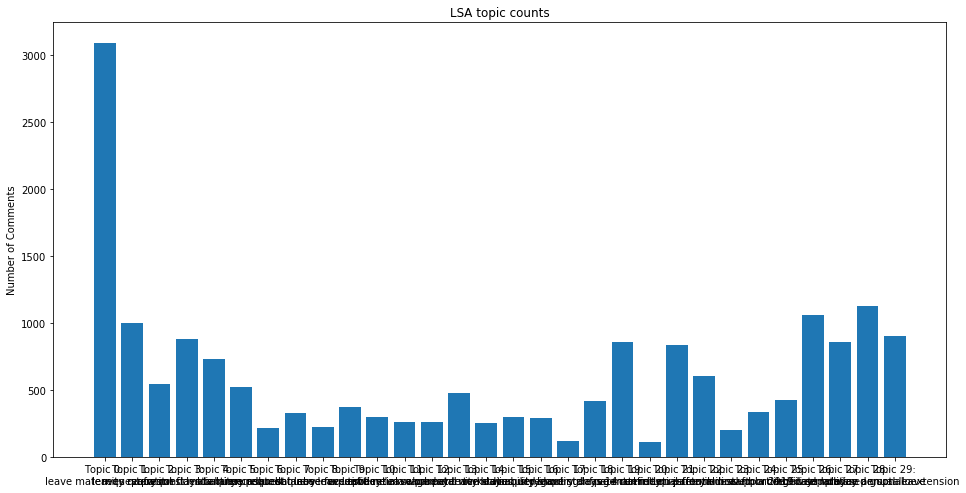

In [31]:
#Latent Semantic Analysis with 
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Comments');
ax.set_title('LSA topic counts');
plt.show();